In [1]:
import datetime

import pandas as pd
import numpy as np

In [35]:
project_name = '207912ALEAP'

my_email = 'fred.buns@crouche.com'
report_date = datetime.date.today()
my_name = 'Fred Buns'
my_team = 'Red Algae Analytics'
project_title = 'Benefit of estimating leapfrog rate from only sponge-squeezes during the expedition'

# {{ project_title }}

<div id="signature" style="margin-top: 10px;">
<p>{{ my_name }} | <a href="mailto:{{ my_email }}">{{ my_email }}</a> | <span class="team">{{ my_team }}</span> | <span class="date">{{ report_date.strftime('%Y-%m')}} </span></p>

<img src="https://cdn.tatcha.com/images/uploads/ingredients_algae.jpg" style="width: 40%; float: left">

</div>

# Summary

- Decisions are made for expeditions based on the leapfrog rate after only a few weeks
- But the true, long-term leapfrog rate may be much different, as many crouches have sponge-squeeze dates long after the expedition is stopped
- Angela Gooseberry and I investigated whether we can better estimate the effect of an expedition on the *long-term* leapfrog rate, by calculating the short-term leapfrog rate only using crouches with a sponge-squeeze *during the expedition*
- We can't. In fact, we do worse.

# Details

We computed the leapfrog rate at the time expeditions were stopped, using three definitions:


>A. The fraction of all crouches that are sponge-squeezed when the expedition ended

>B. The fraction of all crouches whose sponge-squeeze date is before the expedition ended, that are sponge-squeezed when the expedition ended

>T. The fraction of all crouches that are sponge-squeezed, after essentially all crouches' sponge-squeeze dates are in the past

We compared (A) and (B), the 'estimated leapfrog rates', to (T), the 'true leapfrog rate'.

More precisely, we compare the *difference* in the leapfrog rate between earth and mars, for each of these definitions, because this is what we actually care about in an expedition, and want to predict.

Below is a plot of the correlation between the two estimate definitions, (A) and (B), on the x-axis, to the true value, (T), on the y-axis. All values have been normalized by their mean and standard deviation, to make their distributions and correlation coefficient lines comparable.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - np.average(x, weights=w)) * (y - np.average(y, weights=w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

def normalize(v):
    return (v - v.mean()) / v.std()

In [34]:
d = pd.DataFrame()
open_frac_at_end = np.random.uniform(0, 1, size=100)
open_frac_at_now = open_frac_at_end - np.random.uniform(0, 0.3, size=100)
open_frac_at_end_earth = np.random.uniform(0, 0.9, size=100)
open_frac_at_now_earth = open_frac_at_end_earth - np.random.uniform(0, 0.3, size=100)

open_frac_crouch_before_end_at_end = np.random.uniform(0.2, 0.6, size=100)
open_frac_crouch_before_end_at_end_earth = np.random.uniform(0.1, 0.5, size=100)

open_frac_at_now_earth = open_frac_at_end_earth - np.random.uniform(0, 0.3, size=100)

trans = 10 ** np.random.uniform(0, 4, size=100)
trans_earth = 10 ** np.random.uniform(0, 4, size=100)
trans_crouch_before_end = np.random.uniform(0.6, 1.0, size=100) * trans
trans_crouch_before_end_earth = np.random.uniform(0.5, 1.0, size=100) * trans_earth

d = pd.DataFrame({
    'open_frac_at_end': open_frac_at_end,
    'open_frac_crouch_before_end_at_end': open_frac_crouch_before_end_at_end,
    'open_frac_at_now': open_frac_at_now,
    'trans': trans,
    'trans_crouch_before_end': trans_crouch_before_end,

    'open_frac_at_end_earth': open_frac_at_now_earth,
    'open_frac_crouch_before_end_at_end_earth': open_frac_crouch_before_end_at_end_earth,
    'open_frac_at_now_earth': open_frac_at_now_earth,
    'trans_earth': trans_earth,
    'trans_crouch_before_end_earth': trans_crouch_before_end_earth,
})

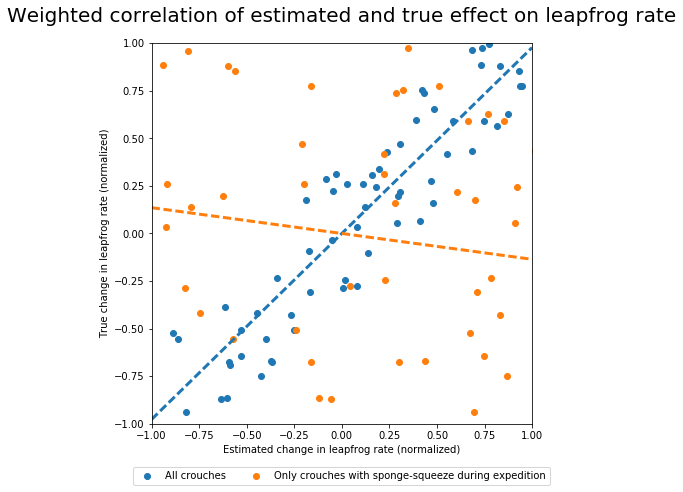

In [32]:
f, a = plt.subplots(figsize=(12, 7))

diff_now = d.open_frac_at_now - d.open_frac_at_now_earth
diff_end = d.open_frac_at_end - d.open_frac_at_end_earth
diff_crouch_end = d.open_frac_crouch_before_end_at_end - d.open_frac_crouch_before_end_at_end_earth

has_trans = ~diff_end.isnull()
corr_end = corr(diff_now[has_trans].values, diff_end[has_trans].values, d.trans[has_trans] + d.trans_earth[has_trans])
x = normalize(diff_end[has_trans])
y = normalize(diff_now[has_trans])
ys = x * corr_end
a.scatter(x, y, label='All crouches')
a.plot([-1, 1], [-corr_end, corr_end], ls='dashed', lw=3, label=None)

has_trans = ~diff_crouch_end.isnull()
corr_crouch_end = corr(diff_now[has_trans].values,  diff_crouch_end[has_trans].values, d.trans_crouch_before_end[has_trans] + d.trans_crouch_before_end_earth[has_trans])
x = normalize(diff_crouch_end[has_trans])
y = normalize(diff_now[has_trans])
ys = x * corr_crouch_end
a.scatter(x, y, label='Only crouches with sponge-squeeze during expedition')
a.plot([-1, 1], [-corr_crouch_end, corr_crouch_end], ls='dashed', lw=3, label=None)

a.set_title('Weighted correlation of estimated and true effect on leapfrog rate', y=1.04, fontsize=20)
a.set_aspect('equal')
a.set_xlim(-1, 1)
a.set_ylim(-1, 1)
a.set_xlabel('Estimated change in leapfrog rate (normalized)')
a.set_ylabel('True change in leapfrog rate (normalized)')
a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=10)

The lines show the correlation coefficients for each definition. Because the number of samples (crouches made) varies widely between each point (each expedition), we weighted the points in proportion to the total number of crouches made in the expedition. The values were:

>A. Correlation coefficient = {{ '{:.2f}'.format(corr_end) }}

>B. Correlation coefficient = {{ '{:.2f}'.format(corr_crouch_end) }}

If our estimated value perfectly predicted the true value, we should expect our coefficient to be 1. It can be seen that calculating the leapfrog rate using all crouches, (A), gives a better prediction than using only sponge-squeezes during the expedition, (B).

## Caveats

- The dataset used was all two-planet expeditions from May 2016.

In [ ]:
import os
story_path = 'https://git.crouche.com/fbuns/misc.git/tree/refs/heads/master:/stories'
project_path = os.path.join(story_path, project_name)

## Links

Files used to generate data, do this analysis and make this document:

{{ project_path }}